<font size=7 face="courier">Electrophysiology Source Code

This is the code used to create the diagrams in the notebook, `Electrophysiology_Introduction.ipynb`. The figures are created from the control dataset, `data_control`, recorded from a cerebral organoid.

# Set Up Notebook

import stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import braingeneers
from braingeneers.analysis.analysis import SpikeData
import scipy.io as sio
import scipy
from scipy.ndimage import gaussian_filter1d
#!pip install powerlaw

<font color="blue">mat_to_spikeData</font> is a helper function for loading the data into braingeneerspy's prefered class for analyzing ephys data.

In [40]:
def mat_to_spikeData(mat_path):
    mat = sio.loadmat(mat_path)
    units = [i[0][0]*1e3 for i in mat['spike_times']]
    sd = SpikeData(units)
    return sd

Load in the control dataset from Tal's experiment on a cerbral organoid. We call this dataset, `data_control`

In [41]:
data_control = mat_to_spikeData('data/Spike_Raster_Control.mat')

# Make Raster Plot

<font color="blue">plot_raster</font> plots the entire spike raster (spike train) for a given dataset. It's input is a `SpikeData`, as defined in the analysis package of the `braingeneerspy` python package.

In [48]:
def plot_raster(sd):
    idces, times = sd.idces_times()
    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    plt.show()

In [78]:
#plot_raster(data_control)

# Analyze Raster Plot

<font color="blue">raster_analysis</font> plots the first $x$ amount of seconds of the spike raster ($x$=20 by default). The plot also include a red moving average linge of the firing rate over a short window. The is useful for determining how much neural activity is occuring during short windows of time.

In [38]:
def raster_analysis(sd, seconds=20):
    # Zoomed Raster and pop rate
    # Get coordinates for raster
    idces, times = sd.idces_times()

    # Get population rate for everything
    pop_rate = sd.binned(bin_size=1)# in ms
    # Lets smooth this to make it neater
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float),sigma=sigma) 
    t = np.linspace(0,sd.length,pop_rate.shape[0])/1000

    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax2 = ax.twinx()
    ax2.plot(t,pop_rate_smooth,c='r')

    ax.set_xlim(0,seconds)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    ax2.set_ylabel('Firing Rate')
    plt.show()

In [7]:
#raster_analysis(data_control)

# Interspike interval 

<font color="blue">interspike</font> computes the interspike interval across all neurons. It's input is a `SpikeData`, as defined in the analysis package of the `braingeneerspy` python package. Intervals between spikes greater than 100ms are ignored, becuase such intervals are not likely to represent a form of periodic behavior. 

In [115]:
def interspike(sd):
    # Interspike-intervals of 2 select neurons
    isis_raw = sd.interspike_intervals()
    # Remove all isi's greater than 100ms. As there are likely neurons not following periodic firing pattern
    isis=[]
    for i in range(len(isis_raw)):   
        isi=isis_raw[i]
        isis = isis + isi[isi<100].tolist() 
        
    # Plot the isi's
    plt.xlim(0,100)
    plt.hist(isis, bins=50)
    plt.xlabel('Time bin(ms)')
    plt.ylabel('ISI count')
    plt.show()

In [117]:
#interspike(data_control)

# Correlation Matrix

<font color="blue">correlation</font> computes the correlation matrix.  It's input is a `SpikeData`, as defined in the analysis package of the `braingeneerspy` python package.

In [109]:
def correlation(sd):
    # Correlation
    corr = np.zeros((sd.N,sd.N)) #inds by inds

    dense_raster = sd.raster(bin_size=1) # in ms
    sigma = 5                            # Blur it
    dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 
    corr=np.corrcoef( dense_raster )
    
    plt.imshow(corr)
    plt.xlabel("Neuron index")
    plt.ylabel("Neuron index")
    plt.show() 
        

In [111]:
#correlation(data_control)

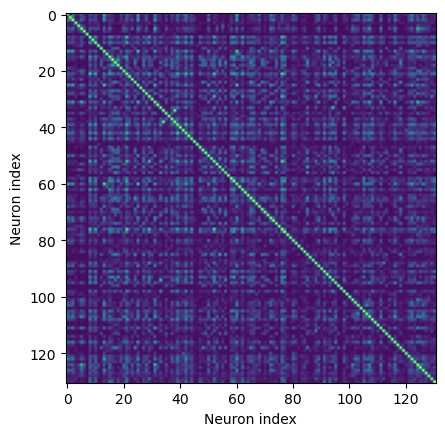

In [121]:
corr = np.zeros((sd.N,sd.N)) #inds by inds

dense_raster = sd.raster(bin_size=1) # in ms
sigma = 5                            # Blur it
dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 
corr=np.corrcoef( dense_raster )

plt.imshow(corr)
plt.xlabel("Neuron index")
plt.ylabel("Neuron index")
plt.show() 
